# Support Vector Machines

Support Vector Machines are Binary classification algorithms that serve the purpose of finding an n-dimensional hyperplane that seperates the data into categories, optimising for the highest geometric and functional margins.

Moreover, SVMs are also efficient at handling large dimensions for the feature vectors through Kernels (even upto infinite dimensions), and hence can be used to seperate non-linearly seperable data by transforming it to a higher dimension feature vector.

## SVM Equation

The equation of a hyperplane in an $n$-dimensional space is:
$$
\mathbf{w}^T \mathbf{x} + b = 0
$$
where
$\mathbf{w}$ is the weight vector (perpendicular to the hyperplane),
$\mathbf{x}$ is the feature vector,
$b$ is the bias term.

The goal of an SVM is to classify data points by finding the hyperplane that maximizes the margin between the two classes. For a data point $\mathbf{x}$, the classification decision is made based on:
$$
h_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w}^T\mathbf{x}+b)
$$
where
$$
    g(z) = 
    \begin{cases}
    1 & z \geq 0 , \\
    -1 & otherwise
    \end{cases}
$$


### Geometric Margin
The geometric margin measures the perpendicular distance from a data point $\mathbf{x}^i$ to the hyperplane:
$$
\gamma^i = \frac{y^i (\mathbf{w}^T \mathbf{x}^i + b)}{\|\mathbf{w}\|}
$$
Where $y_i \in \{-1, +1\}$ is the label of $\mathbf{x}^i$.

The geometric margin with respect to entire training set is:
$$
\gamma = \min_{1 \geq i \geq m} \gamma^i 
$$

### Functional Margin
The functional margin is defined as:
$$
\hat{\gamma}^i = y^i (\mathbf{w}^T \mathbf{x}^i + b)
$$

The functional margin with respect to entire training set is:
$$
\hat{\gamma} = \min_{1 \geq i \geq m} \hat{\gamma}^i 
$$

Clearly, the geometric margin can be derived from the functional margin by dividing it by $\|\mathbf{w}\|$:
$$
\gamma^i = \frac{\hat{\gamma}^i}{\|\mathbf{w}\|}
$$

## Optimal Margin Classifier (Linearly Seperable Case)

It aims to find the optimal hyperplane, we maximize the margin while ensuring all points are correctly classified, i.e.
$$
\begin{aligned}
\max_{\mathbf{w}, b} \quad & \gamma \\
s.t. \quad & \frac{y^i (\mathbf{w}^T \mathbf{x}^i + b)}{\|\mathbf{w}\|} \geq \gamma, \quad 1 \leq i \leq m
\end{aligned}
$$

By adding a scaling constraint such that $\hat{\gamma}=1$, the problem can be reduced to its primal form and hence made convex.

### Primal Form
The primal optimization problem is:
$$
\begin{aligned}
\min_{\mathbf{w}, b} \quad & \frac{1}{2} \|\mathbf{w}\|^2 \\
s.t. \quad & y^i (\mathbf{w}^T \mathbf{x}^i + b) \geq 1, \quad 1 \leq i \leq m
\end{aligned}
$$

### Dual Form
Using the Lagrange multiplier method, the dual problem is formulated as:
$$
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^i y^j < \mathbf{x}^i, \mathbf{x}^j > \\
s.t. \quad & \sum_{i=1}^m \alpha_i y^i = 0, \quad \alpha_i \geq 0 \ , \quad 1 \leq i \leq m
\end{aligned}
$$
Here $< \mathbf{p},\mathbf{q}> = \mathbf{p}^T\mathbf{q}$ is called the **Inner Product** of $\mathbf{p}$ & $\mathbf{q}$. \
\
The training examples $x^s$ for which $\alpha^s \neq 0$ are the **Support Vectors** for the dataset. These datapoints have functional margin equal to 1. \
\
The primal and dual forms are convex quadratic programming problems and hence can be computed using QP solvers. Dual forms have the additional advantage of having objective function in terms of $< \mathbf{x}^i, \mathbf{x}^j >$, allowing for the Kernel trick to be applied for highly dimensional data.

## Kernel Trick for Linearly Non-Seperable Data

When the data is not linearly separable in the original feature space, we map it to a higher-dimensional space $\phi$ using a kernel function:
$$
K(\mathbf{x}^i, \mathbf{x}^j) \ = \ <\phi(\mathbf{x}^i), \phi(\mathbf{x}^j)> \ = \ \phi(\mathbf{x}^i)^T \phi(\mathbf{x}^j)
$$
Common kernel functions include:
- **Linear Kernel**: $K(\mathbf{x}^i, \mathbf{x}^j) = <\mathbf{x}^i, \mathbf{x}^j>$
- **Polynomial Kernel**: $K(\mathbf{x}^i, \mathbf{x}^j) = (<\mathbf{x}^i, \mathbf{x}^j> + c)^p$
- **Gaussian (RBF) Kernel**: $K(\mathbf{x}^i, \mathbf{x}^j) = \exp\left(-\frac{\|\mathbf{x}^i - \mathbf{x}^j\|^2}{2\sigma^2}\right)$

Using the kernel trick, the dual problem becomes:
$$
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^i y^j \ K(\mathbf{x}^i, \mathbf{x}^j) \\
s.t. \quad & \sum_{i=1}^m \alpha_i y^i = 0, \quad \alpha_i \geq 0 \ , \quad 1 \leq i \leq m
\end{aligned}
$$

## Soft Margin SVMs

To allow for some outliers in the data, we use the concept of soft margin SVMs, L1 norm SVM specifically in this case. Here we use slack variables $\xi_i \geq 0$ to allow for misclassifications, with a cost parameter $c$. \
\
The primal form is modified to penalize misclassifications:
$$
\begin{aligned}
\min_{\mathbf{w}, b} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \xi_i \\
s.t. \quad & y^i (\mathbf{w}^T \mathbf{x}^i + b) \geq 1-\xi_i, \quad 1 \leq i \leq m
\end{aligned}
$$
Where $C > 0$ is a cost parameter controlling the tradeoff between maximizing the margin and minimizing misclassification errors. \
\
Hence the dual form becomes:
$$
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^i y^j \ K(\mathbf{x}^i, \mathbf{x}^j) \\
s.t. \quad & \sum_{i=1}^m \alpha_i y^i = 0, \quad 0 \leq \alpha_i \leq c \ , \quad 1 \leq i \leq m
\end{aligned}
$$

## Sequential Minimal Optimization(SMO) Algorithm

The SMO Algorithm, first propsed by John Platt, is an iterative algorithm to get a approximately correct solution to the dual QP problem shown above. It works by keeping all $\alpha_i$ fixed except for 2, modifying them to get the optimal values to maximise the dual form using coordinate ascent.

### Dual Optimization

The dual optimization problem focuses on maximizing the following Lagrangian:

$$
L(\mathbf{\alpha}) = \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j).
$$

### KKT Conditions

The Karush-Kuhn-Tucker (KKT) conditions for the optimization are:

1. $\alpha_i = 0 \implies y_i f(\mathbf{x}_i) \geq 1$.
2. $0 < \alpha_i < C \implies y_i f(\mathbf{x}_i) = 1$.
3. $\alpha_i = C \implies y_i f(\mathbf{x}_i) \leq 1$.

### Algorithm

#### 1. Selecting Two Variables

At each iteration, the SMO algorithm selects two Lagrange multipliers $\alpha_1$ and $\alpha_2$ to optimize using some heuristic to reach a solution faster. Let $i$ and $j$ denote their indices. The goal is to solve the optimization problem for these two variables while keeping the others fixed.

#### 2. Compute Bounds for $\alpha_j$

Define:

$$
E_i = f(\mathbf{x}^i) - y^i,
$$

where $f(\mathbf{x}^i)$ is the predicted value for $\mathbf{x}^i$.

The bounds for $\alpha_j$ are given by:

$$
\begin{aligned}
    L &= \max(0, \alpha_j - \alpha_i) \quad \text{if } y^i \neq y^j, \\
    L &= \max(0, \alpha_i + \alpha_j - C) \quad \text{if } y^i = y^j, \\
    \\
    H &= \min(C, \alpha_j - \alpha_i + C) \quad \text{if } y^i \neq y^j, \\
    H &= \min(C, \alpha_i + \alpha_j) \quad \text{if } y^i = y^j.
\end{aligned}
$$

#### 3. Update $\alpha_1$ and $\alpha_2$

Compute the second derivative of the objective function:

$$
\eta = 2K(\mathbf{x}^i, \mathbf{x}^j) - K(\mathbf{x}^i, \mathbf{x}^i) - K(\mathbf{x}^j, \mathbf{x}^j).
$$

Update $\alpha_j$:

$$
\alpha_j^{\text{new}} = \alpha_j^{\text{old}} + \frac{y^j (E_i - E_j)}{\eta}.
$$

Clip $\alpha_j^{\text{new}}$:

$$
\alpha_j^{\text{new}} = \begin{cases}
    H & \text{if } \alpha_j^{\text{new}} > H, \\
    L & \text{if } \alpha_j^{\text{new}} < L, \\
    \alpha_j^{\text{new}} & \text{otherwise}.
\end{cases}
$$

Update $\alpha_i$:

$$
\alpha_i^{\text{new}} = \alpha_i^{\text{old}} + y_i y_j (\alpha_j^{\text{old}} - \alpha_j^{\text{new}}).
$$

#### 4. Update Bias Term $b$

Compute the new bias $b$ using the KKT conditions:

$$
\begin{aligned}
    b_1 &= b - E_i - y_i (\alpha_i^{\text{new}} - \alpha_i^{\text{old}}) K(\mathbf{x}_i, \mathbf{x}_i) - y_j (\alpha_j^{\text{new}} - \alpha_j^{\text{old}}) K(\mathbf{x}_i, \mathbf{x}_j), \\
    b_2 &= b - E_j - y_i (\alpha_i^{\text{new}} - \alpha_i^{\text{old}}) K(\mathbf{x}_i, \mathbf{x}_j) - y_j (\alpha_j^{\text{new}} - \alpha_j^{\text{old}}) K(\mathbf{x}_j, \mathbf{x}_j).
\end{aligned}
$$

Choose the new bias as:

$$
\begin{aligned}
    b &= \begin{cases}
        b_1 & \text{if } 0 < \alpha_i^{\text{new}} < C, \\
        b_2 & \text{if } 0 < \alpha_j^{\text{new}} < C, \\
        \frac{b_1 + b_2}{2} & \text{otherwise}.
    \end{cases}
\end{aligned}
$$

#### 5. Repeat Until Convergence

The algorithm repeats the steps above until the funciton converges, i.e. all KKT conditions are satisfied approximately by a tolerance value.

## Implementation

### Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('future.no_silent_downcasting', True)

In [2]:
ls = pd.read_csv('LinearlySeperable.csv')
nls = pd.read_csv('LinearlyNonSeperable.csv')
ls.columns = ['x1', 'x2', 'class']
nls.columns = ['x1', 'x2', 'class']
print(ls)
print(nls)

          x1        x2  class
0   3.764052  2.400157    1.0
1   2.978738  4.240893    1.0
2   3.867558  1.022722    1.0
3   2.950088  1.848643    1.0
4   1.896781  2.410599    1.0
..       ...       ...    ...
95 -3.292857 -1.732949   -1.0
96 -2.039283 -3.168093   -1.0
97 -1.476723 -2.171546   -1.0
98 -1.228209 -1.176496   -1.0
99  0.163236 -0.663472   -1.0

[100 rows x 3 columns]
           x1        x2  class
0   -3.481780  3.552236    0.0
1    4.612666 -0.796960    0.0
2   -0.518591 -5.100363    0.0
3   -5.063498 -1.544642    0.0
4    2.674056  4.466139    0.0
..        ...       ...    ...
195  1.634141  0.950284    1.0
196  0.393019 -2.420426    1.0
197 -1.855980 -0.974798    1.0
198 -2.714805  1.729742    1.0
199  2.331608 -1.260352    1.0

[200 rows x 3 columns]


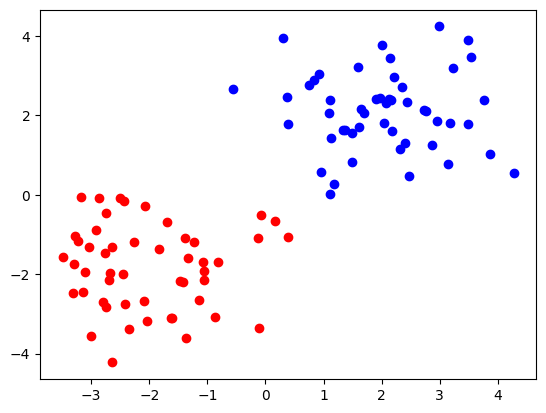

In [3]:
plt.figure()
ls_t = ls[ls['class']==1]
ls_f = ls[ls['class']!=1]

plt.scatter(ls_t['x1'],ls_t['x2'],color="blue")
plt.scatter(ls_f['x1'],ls_f['x2'],color="red")

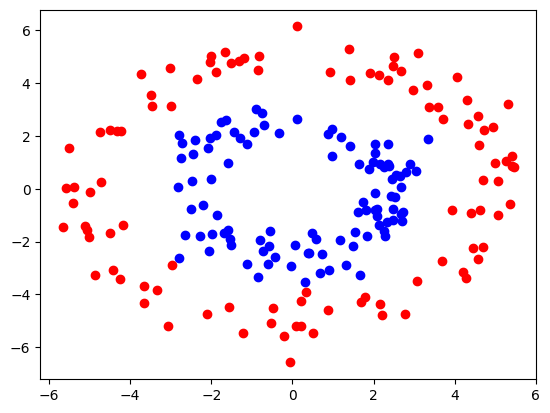

In [4]:
plt.figure()
nls_t = nls[nls['class']==1]
nls_f = nls[nls['class']!=1]

plt.scatter(nls_t['x1'],nls_t['x2'],color="blue")
plt.scatter(nls_f['x1'],nls_f['x2'],color="red")

In [5]:
class SVM:
    def __init__(self, X, y, kernel, C=1, tol=1e-3, max_iter=100):
        self.C = C
        self.tol = tol
        self.max_iter = max_iter
        self.kernel = kernel
        self.X = X
        self.y = y

    def fit(self):
        X = self.X
        y = self.y
        m, n = X.shape
        
        self.alpha = np.zeros(m)
        self.b = 0
        iter = 0

        while iter < self.max_iter:
            num_changed_alphas = 0

            for i in range(m):
                wTx_i = self.z(self.X[i])
                E_i = wTx_i-y[i]

                # Checks KKT conditions
                if (not self.KKT(i,wTx_i)):
                    j = self.selectj(i, m)
                    E_j = self.z(self.X[j]) - y[j]

                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]

                    # Calculates L and H
                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])

                    if L == H:
                        continue

                    # Computes eta
                    K_ii = self.kernelf(self.X[i], self.X[i])
                    K_ij = self.kernelf(self.X[i], self.X[j])
                    K_jj = self.kernelf(self.X[j], self.X[j])
                    eta = 2 * K_ij - K_ii - K_jj

                    if eta >= 0:
                        continue

                    # Updates alpha_j
                    self.alpha[j] -= y[j] * (E_i - E_j) / eta
                    self.alpha[j] = np.clip(self.alpha[j], L, H)

                    if abs(self.alpha[j] - alpha_j_old) < 1e-5:
                        continue

                    # Updates alpha_i
                    self.alpha[i] += y[i] * y[j] * (alpha_j_old - self.alpha[j])

                    # Updates b
                    b1 = self.b - E_i - y[i] * (self.alpha[i] - alpha_i_old) * K_ii - y[j] * (self.alpha[j] - alpha_j_old) * K_ij
                    b2 = self.b - E_j - y[i] * (self.alpha[i] - alpha_i_old) * K_ij - y[j] * (self.alpha[j] - alpha_j_old) * K_jj

                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2

                    num_changed_alphas += 1

            if num_changed_alphas == 0:
                iter += 1
            else:
                iter = 0

    def KKT(self, i, wTx_i):
        if abs(self.alpha[i]) < self.tol:                       #if a_i = 0:
            return y[i] * wTx_i >= 1-self.tol                        #y_i(wTx_i+b) >= 1
        elif 0 < self.alpha[i] < self.C:                        #if 0 < a_i < C:
            return abs(y[i] * wTx_i - 1) < self.tol                  #y_i(wTx_i+b) = 1
        elif (self.alpha[i]-self.C) < self.tol:                 #if a_i = C:
            return y[i] * wTx_i <= 1+self.tol                        #y_i(wTx_i+b) <= 1
        else:
            return False
    
    def predict(self, X):
        predictions = np.array([np.sign(self.z(x)) for x in X])
        return predictions

    def z(self, x):              # Computes wTx^i+b
        result = sum(self.alpha[j] * self.y[j] * self.kernelf(self.X[j], x) for j in range(len(self.X))) + self.b
        return result

    def kernelf(self, x1, x2):           #Calculates K(xi,xj)
        if self.kernel == "RBF":
            gamma = 1 / X.shape[1]**2
            return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)
        return np.dot(x1,x2)

    def selectj(self, i, m):
        j = i
        while j == i:
            j = np.random.randint(0, m)
        return j


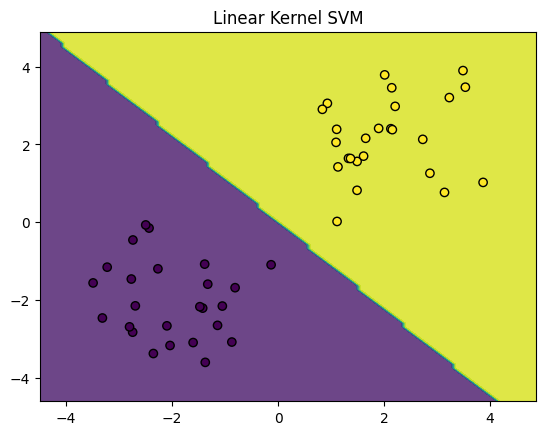

In [6]:
dat = ls.to_numpy()
np.random.shuffle(dat)
X = dat[:50,0:-1]
y = dat[:50,-1]

svm = SVM(X,y,C=1.0, kernel="Linear")
svm.fit()

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("Linear Kernel SVM")
plt.show()


In [7]:
test_X, test_y = dat[50:,:-1], dat[50:,-1]
error = 1-abs(svm.predict(test_X)-test_y)/2
print("Accuracy:", np.sum(error)*2)

Accuracy: 100.0


In [8]:
nls['class'] = nls['class'].replace({0:-1})
dat = nls.to_numpy()
np.random.shuffle(dat)

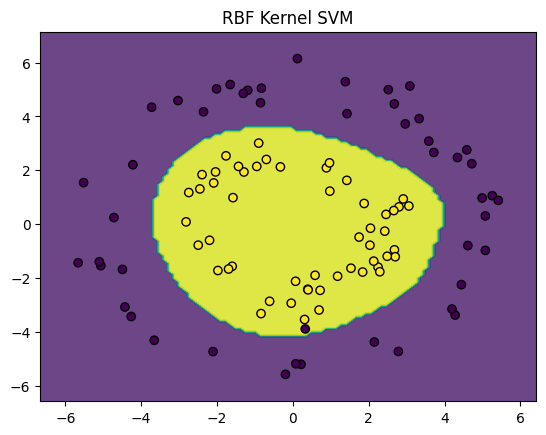

In [9]:
X = dat[:100,0:-1]
y = dat[:100,-1]

svm = SVM(X,y,C=1.0, kernel="RBF")
svm.fit()

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))
Z = svm.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.title("RBF Kernel SVM")
plt.show()

In [10]:
test_X, test_y = dat[100:,:-1], dat[100:,-1]
error = 1-(abs(svm.predict(test_X)-test_y))/2
print("Accuracy:", np.sum(error))

Accuracy: 99.0
